## import library

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [63]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)
### 

In [64]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [65]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [66]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



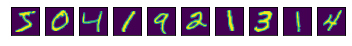


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [67]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [68]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [69]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 




In [70]:
model_1 = select_model(1)

In [71]:
model_2 = select_model(2)

In [72]:
model_3 = select_model(3)

## If you want to see information of model, model.summary() will help
### summary() is also built in function 

In [73]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [75]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 128)        

## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [76]:
model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [77]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [78]:
model_3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [82]:
model_1.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1975 - accuracy: 0.9386
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1732 - accuracy: 0.9459
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1618 - accuracy: 0.9501
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1531 - accuracy: 0.9524
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1445 - accuracy: 0.9551


In [84]:
model_2.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1105 - accuracy: 0.9684
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0656 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0548 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0443 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0374 - accuracy: 0.9887


In [86]:
model_3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0843 - accuracy: 0.9751
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0521 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0428 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0366 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9900


## Test Step 
## Perform Test with Test data 

In [88]:
test_loss, accuracy = model_1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.1745 - accuracy: 0.9500 - 1s/epoch - 3ms/step

Test loss :  0.17453569173812866
Test accuracy : 0.9500000476837158


In [90]:
test_loss, accuracy = model_2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0595 - accuracy: 0.9815 - 1s/epoch - 3ms/step

Test loss :  0.05949927121400833
Test accuracy : 0.9815000295639038


In [92]:
test_loss, accuracy = model_3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0388 - accuracy: 0.9881 - 1s/epoch - 4ms/step

Test loss :  0.038756195455789566
Test accuracy : 0.9881000518798828


## Before prediction, change test image's type to float 32. 

In [93]:
test_images = tf.cast(test_images, tf.float32)
pred1 = model_1.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

108/313 [=========>....................] - ETA: 0s

2022-06-13 17:25:24.733834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [94]:
test_images = tf.cast(test_images, tf.float32)
pred2 = model_2.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

 95/313 [========>.....................] - ETA: 0s

2022-06-13 17:25:26.245521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [95]:
test_images = tf.cast(test_images, tf.float32)
pred3 = model_3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

 84/313 [=======>......................] - ETA: 0s

2022-06-13 17:25:27.495054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [96]:
print('Prediction : ', pred1.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [97]:
print('Prediction : ', pred2.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [98]:
print('Prediction : ', pred3.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [99]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [100]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

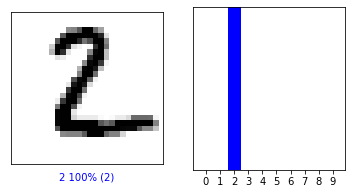

In [101]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred1, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred1,  test_labels)
plt.show()

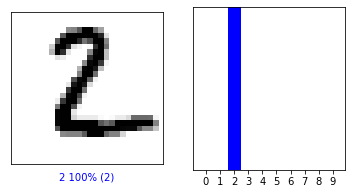

In [102]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred2, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred2,  test_labels)
plt.show()

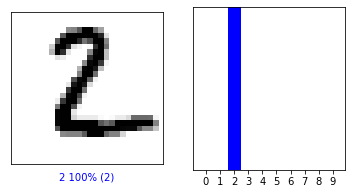

In [103]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred3,  test_labels)
plt.show()

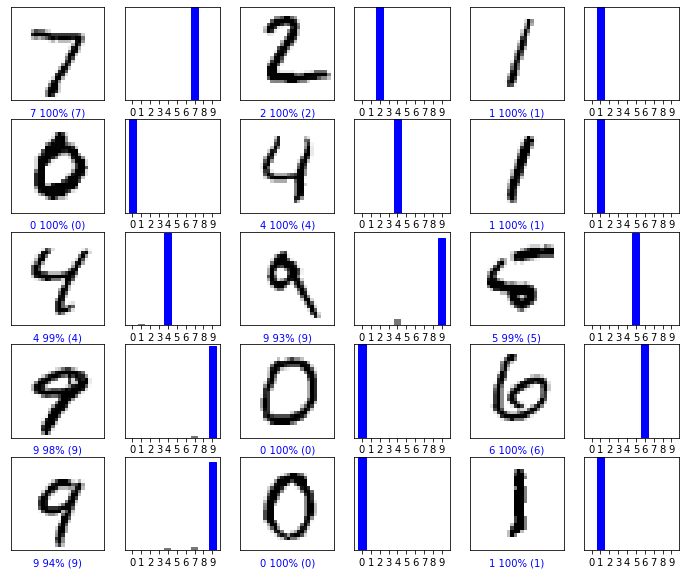

In [104]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred1, test_labels)
plt.show()

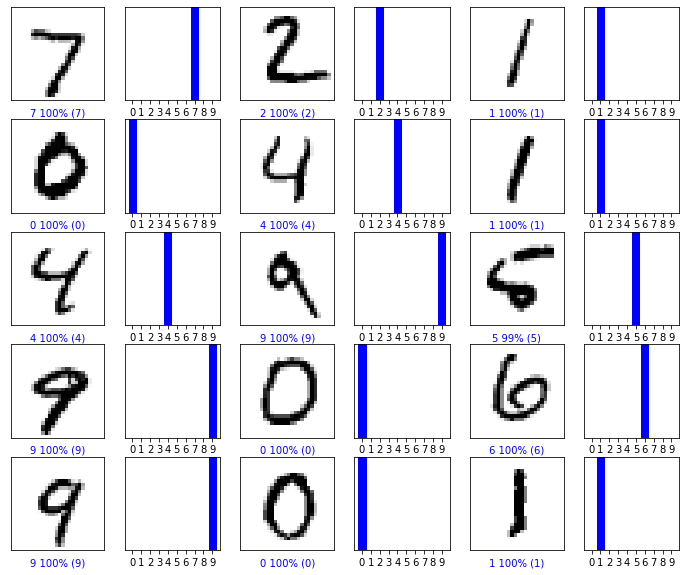

In [105]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred2, test_labels)
plt.show()

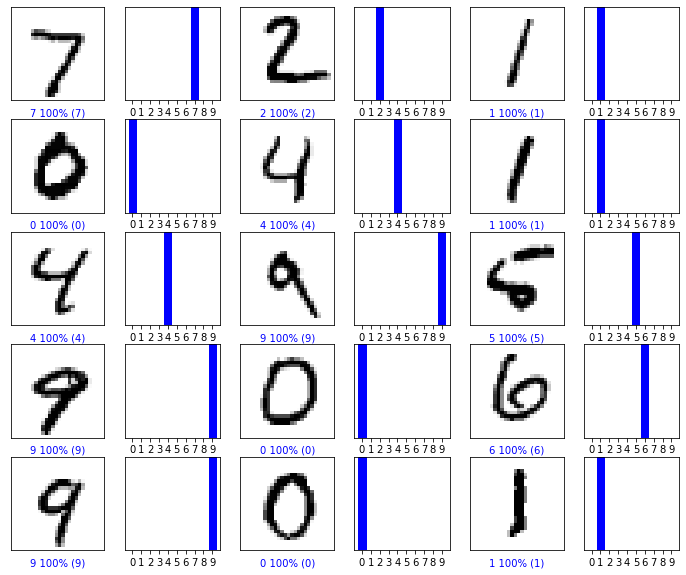

In [106]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred3, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [107]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [114]:
index_1 = error_mnist(pred1, test_labels)
index_slice_1 = index_1[:10]
print(index_1[:10])

[73, 115, 125, 151, 159, 173, 184, 217, 241, 247]


In [115]:
index_2 = error_mnist(pred2, test_labels)
index_slice_2 = index_2[:10]
print(index_2[:10])

[95, 115, 121, 243, 247, 321, 328, 412, 417, 543]


In [116]:
index_3 = error_mnist(pred3, test_labels)
index_slice_3 = index_3[:10]
print(index_3[:10])

[115, 290, 321, 326, 447, 449, 495, 571, 619, 659]


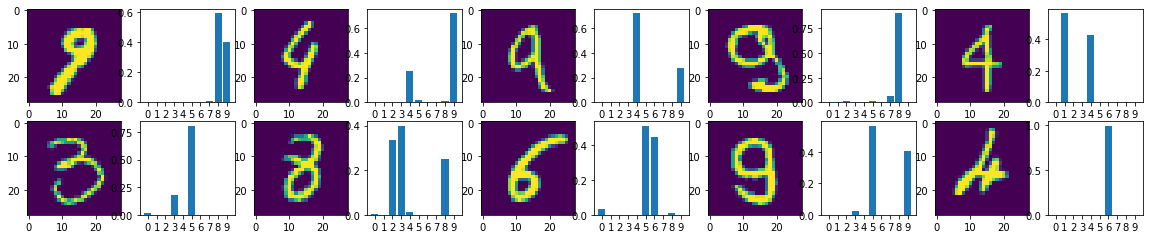

In [117]:
plot_error(index_slice_1, pred1, test_labels)

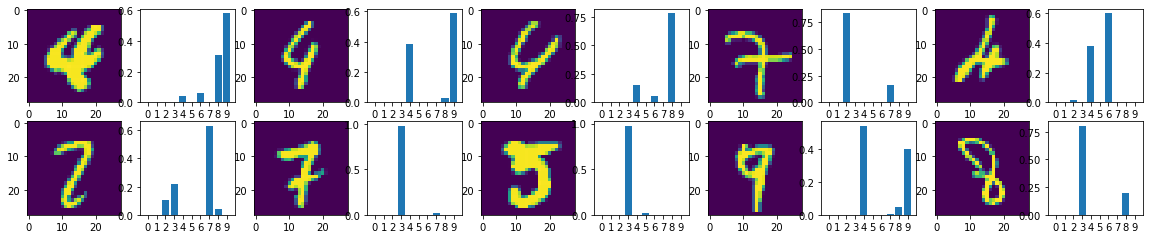

In [118]:
plot_error(index_slice_2, pred2, test_labels)

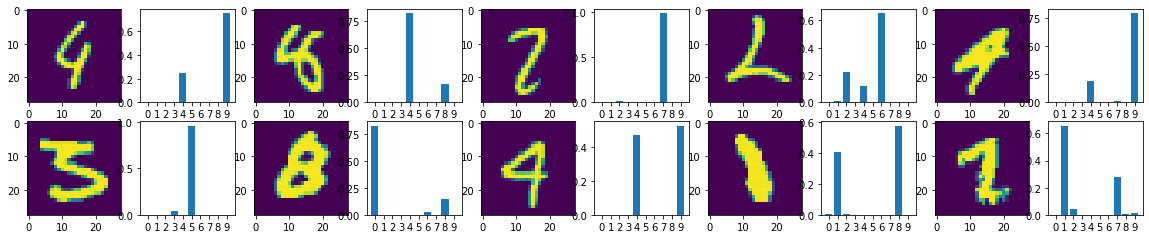

In [119]:
plot_error(index_slice_3, pred3, test_labels)

In [ ]:
DONE